In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))/255
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))/255

encoding_dim = 10
ae_input = Input(shape = (x_train.shape[1],))
encoding_layer = Dense(encoding_dim, activation = "relu")(ae_input)
decoding_layer = Dense(x_train.shape[1], activation = "sigmoid")(encoding_layer)
autoencoder = Model(ae_input, decoding_layer)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=0);

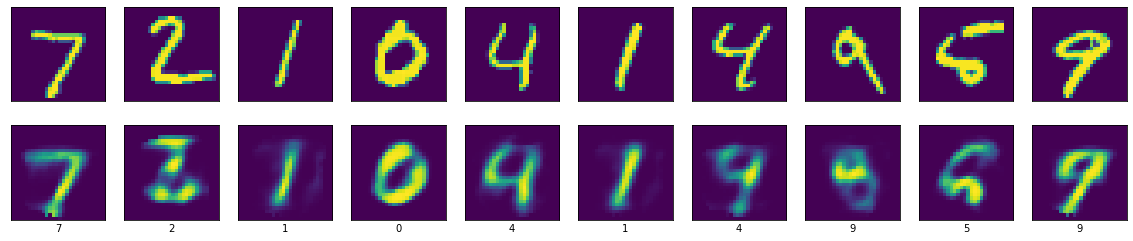

In [2]:
generated = autoencoder.predict(x_test)

nrows, ncols = 2, 10
fig, ax = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
for col in range(ncols):
    ax[0, col].set_xticks([]); ax[0, col].set_yticks([])
    ax[0, col].imshow(x_test[col].reshape(28,28))
    
    ax[1, col].set_xticks([]); ax[1, col].set_yticks([])
    ax[1, col].imshow(generated[col].reshape(28,28))
    ax[1, col].set_xlabel(y_test[col])

In [3]:
encoder = Model(ae_input, encoding_layer)
decoder_input = Input(shape = (encoding_dim, ))
decoder = Model(decoder_input, autoencoder.layers[-1](decoder_input))